![Astrofisica Computacional](../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

---
# Ejercicio 02. Métodos Numéricos Básicos II

## D. Rejillas de Difracción

En un ejercicio anterior se encontró el patró de difracción producido en una pantalla por radiación electromagnética con longitud de onda $\lambda$ incidente en una rejilla de difracción con ancho total $w$ y enfocada por una lente de longitud focal $f$.La función correspondiente es
\begin{equation}
    I(x) = \left| \int^{\frac{w}{2}}_{-\frac{w}{2}} \sqrt{q(u)} \exp{\left(\frac{2\pi i xu}{\lambda f}\right)} du \right|^2,
\end{equation}
donde $x$ es la distancia sobre la pantalla desde el eje central del sistema y $q(u)$ es la función de transmisión de intensidad de la rejilla a una distancia $u$ del eje central (esta función representa la fracción de luz incidente que la rejilla deja atravesar).

En aquel ejercicio se evaluó esta expresión utilizando los métodos usuales de calculo numérico de integrales. Sin  embargo, el mismo resultado puede obtenerse de una forma más eficiente al notar que la integral es en realidad una transformada de Fourier. En efecto, al aproximar la integral utilizando la regla del trapezoide con $n$ nodos ($N=n-1$ sub-intervalos) se tiene
\begin{align}
    \int^{\frac{w}{2}}_{-\frac{w}{2}} \sqrt{q(u)} \exp{\left(\frac{2\pi i xu}{\lambda f}\right)} du =& \frac{w}{N} \exp \left(-\frac{i\pi  wx}{\lambda f}\right) \sum_{j=0}^{N-1} \sqrt{q(u_j)} \exp \left(\frac{i 2\pi  wxj}{\lambda f N}\right)\\
    =& \frac{w}{N} e^{-i\pi k} \sum_{j=0}^{N-1} y_j \exp \left(\frac{i 2\pi  kj}{N}\right)
\end{align}
donde 
\begin{align}
    u_j = &\frac{jw}{N} - \frac{w}{2},\\
    k = &\frac{wx}{\lambda f} 
\end{align}
y $y_j = \sqrt{q(u_j)}$. Comparando con la definición de la DFT se comprueba que la sumatoria corresponde al complejo conjugado $c_k^*$. De esta forma, la intensidad del patrón de interferencia se puede escribir en la forma
\begin{equation}
    I(x_k) = \frac{w^2}{N^2} \left| c_k \right|^2,
\end{equation}
donde
\begin{equation}
    x_k = \frac{\lambda f}{w} k.
\end{equation}

Esta relación muestra que el patrón de intensidad en el punto $x_k$ se encuentra mediante una DFT. Sin embargo, es importante notar que los valores de $k$ son enteros $k=0,1,2,...,N-1$ y por lo tanto los puntos $x_k$ en los cuales se evaluará la intensidad están separados por intervalos de tamaño $\frac{\lambda f}{w}$ en la pantalla. Este espaciado puede ser muy ancho para obtener una buena representación del patrón de difracción. Por ejemplo, al tomar los datos del ejercicio anterior; $\lambda = 500 \text{ nm}$, $f = 1 \text{ m}$ y $w = 200 \text{ } \mu \text{m}$; se tiene un espaciamiento de puntos de $\frac{\lambda f}{w} = 2.5 \text{ mm}$ que en una pantalla de $10 \text{ cm}$ de ancho corresponde a solo 40 puntos para graficar.

Una de las formas de para ajustar este inconveniente es incrementar el ancho de la rejilla de $w$ a $W>w$ con lo que el espaciado entre los puntos en la pantalla será mucho menor. Por ejemplo, al tomar $W=10w$ se incrementará en un factor de 10 el número de puntos en el patrón de difracción. Ahora bien, el espacio agregado a la rejilla debe ser opaco para que no se cambien las propiedades del sistema físico original. Por esta razón, los valores de la función de transferenica en esta nueva región debe ser $y_j = 0$.

De esta forma, en términos del nuevo ancho de la rejilla se tienen las expresiones
\begin{equation}
    I(x_k) = \frac{W^2}{N^2} \left| c_k \right|^2,
\end{equation}
donde
\begin{equation}
    x_k = \frac{\lambda f}{W} k
\end{equation}
y 
\begin{equation}
    c_k = \sum_{j=0}^{N-1} y_j \exp \left(\frac{i 2\pi  kj}{N}\right).
\end{equation}

---

1. Escriba un código que utilice la FFT para calcular el patrón de difracción para una rejilla con la función de transmisión $q(u) = \sin^2 (\alpha u)$ con una separación entre slits de $20 \text{ } \mu \text{m}$ y con los siguientes parámetros: $\lambda = 500 \text{ nm}$, $f = 1 \text{ m}$, $w = 200 \text{ } \mu \text{m}$, $W = 10w = 2 \text{ mm}$ y una pantalla con un ancho total de $10 \text{ cm}$.
    Elija un número de puntos, $n$, adecuado para obtener una buena aproximación de la función de transmisión y realice un gráfico del patrón de intensidad en la pantalla en función de la posición $x$ en el rango $-5 \text{ cm} \leq x \leq 5 \text{ cm}$. Este patrón debe ser el mismo obtenido en los Ejercicios 01.

**Solución**

Primero se definirá la función de transmisión y se creará un arreglo con los puntos para la FFT. 

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def q(u,slit_separation):
    '''
    Transmission function
    ------------------------------------------------------------
    Arguments
    u: point location in the grid measured in micro-meters
    slit_separation: separation between slits measured in 
                     micro-meters
    ------------------------------------------------------------
    Dependences: NumPy
    ------------------------------------------------------------
    '''
    # Parameter alpha in the transmission function
    alpha = np.pi/slit_separation
    return (np.sin(alpha*u))**2

# Separtions between slits (micro-meters)
slit_separation = 20

# Total number of slits
N_slits = 10

# Total width of the grid
w = slit_separation*N_slits

if N_slits%2 == 0:
    w_m = slit_separation*N_slits/2
else:
    w_m = slit_separation*(N_slits+1)/2

# Number of points for the FFT
n = 400

u_range = np.linspace(-w_m, w_m, n)

y = np.sqrt(q(u_range, slit_separation))

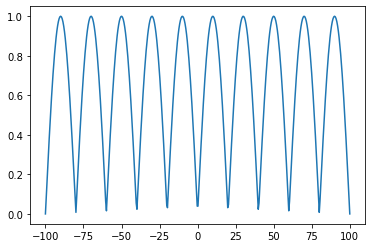

In [75]:
plt.figure()
plt.plot(u_range, y)
plt.show()

---
3. Implemente un código que calcule y grafique la intensidad del patrón de intensidad producido por la rejilla descrita en el punto anterior si esta tiene un total de 10 slits y la longitud de onda de la radiación incidente es $\lambda = 500 \text{ nm}$. Además, asuma que la longitud focal del lente es $f = 1 \text{ m}$ y que el ancho de la pantalla es de $10 \text{ cm}$.

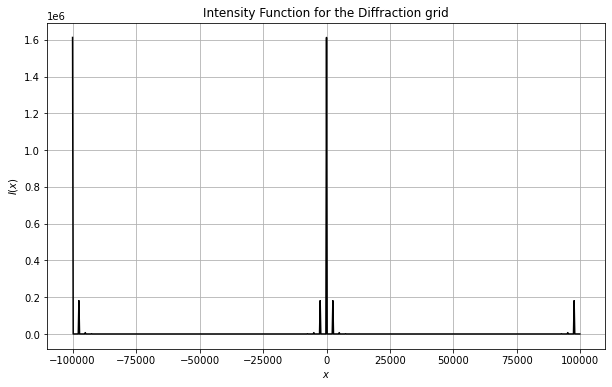

In [76]:
from scipy.fft import fft

# Parameters
lmbda=500 # nm
fd=1 # m
screen_size = 10 # cm

lmbda *= 1e-3 # nm to micrometer
fd *= 1e6 # m to micrometer
screen_size *= 1e4 # cm to micrometer

W = 10*w

N_screen = int(screen_size/(lmbda*fd/W))

c = fft(y)

x_range = (lmbda*fd/W)*np.arange(-N_screen, N_screen)
intensity_pattern = np.ones_like(x_range)
for i in range(N_screen):
    intensity_pattern[i+N_screen] = (W*abs(c[i])/N_screen)**2
    intensity_pattern[i] = (W*abs(c[i-N_screen])/N_screen)**2

plt.figure(figsize=(10,6))
plt.plot(x_range, intensity_pattern, color='black')
#plt.plot(range(len(c)), abs(c), color='black')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$I(x)$')
plt.title('Intensity Function for the Diffraction grid')
plt.show()

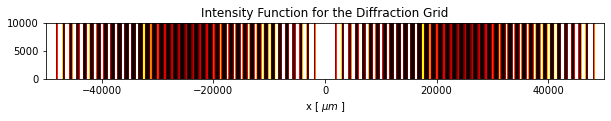

In [77]:
N = 1000
xygrid = np.zeros([N,2*N_screen])
diffraction_pattern = np.zeros([N,2*N_screen])

for i in range(N):
    diffraction_pattern[i,:] =intensity_pattern 

extent = -5e4,5e4,0,1e4
plt.figure(figsize=(10,10))
plt.imshow(diffraction_pattern, cmap='hot', vmax=1, extent=extent)
plt.title('Intensity Function for the Diffraction Grid')
plt.xlabel(r'x [ $\mu m$ ]')
plt.show()